<a href="https://colab.research.google.com/github/Wakeel-create/Wakeel-create/blob/main/Linear_Regression(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Model**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [ ]:
#load dataset
df = pd.read_csv("/content/student_performance.csv")
df.head()
Back_up = df.copy()


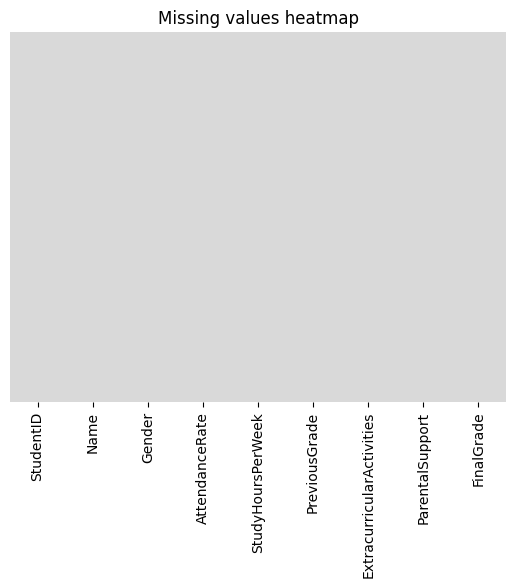

In [ ]:
#deal with missing values
sns.heatmap(Back_up.isnull(), yticklabels=False, cbar=False,cmap = 'tab20c_r')
plt.title('Missing values heatmap')
plt.show()

In [ ]:
df.shape

(10, 9)

# **Remove irrelevent features**

In [ ]:
Back_up.drop(['StudentID','Name','Gender','ExtracurricularActivities'],axis=1,inplace = True)

In [ ]:
Back_up.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ParentalSupport,FinalGrade
0,85,15,78,High,80
1,90,20,85,Medium,87
2,78,10,65,Low,68
3,92,25,90,High,92
4,88,18,82,Medium,85


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
Back_up['ParentalSupport'] = LabelEncoder().fit_transform(Back_up['ParentalSupport'])


In [ ]:
Back_up.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ParentalSupport,FinalGrade
0,85,15,78,0,80
1,90,20,85,2,87
2,78,10,65,1,68
3,92,25,90,0,92
4,88,18,82,2,85


In [ ]:
#five number summary
Back_up.describe()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ParentalSupport,FinalGrade
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,85.600000,17.700000,78.100000,0.900000,80.200000
std,7.441625,6.848357,10.170218,0.875595,10.097304
min,70.000000,8.000000,60.000000,0.000000,62.000000
25%,82.750000,12.750000,71.750000,0.000000,73.500000
50%,86.500000,17.500000,80.000000,1.000000,82.500000
75%,90.750000,21.500000,85.750000,1.750000,87.750000
max,95.000000,30.000000,90.000000,2.000000,92.000000


# **Target variable splitting**

In [ ]:
#Create matrix of features
x = Back_up.drop('FinalGrade', axis = 1) #scored all features in x except finalgrade #input

#create target variable
y = Back_up['FinalGrade'] #splited y column with only target variable(final grade) #ouput


In [ ]:
x.shape

(10, 4)

In [ ]:
y.shape

(10,)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
x_train

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ParentalSupport
0,85,15,78,0
4,88,18,82,2
9,91,22,86,0
3,92,25,90,0
5,95,30,88,0
7,85,17,77,2
6,70,8,60,1
1,90,20,85,2


In [ ]:
y_train

,FinalGrade
0,80
4,85
9,88
3,92
5,90
7,78
6,62
1,87


# **Model Training**

In [ ]:
#Fit
#import model
from sklearn.linear_model import LinearRegression

# create instance of model
lin_reg = LinearRegression()

#pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

# **Model Testing**

In [ ]:
#predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(2,)
[71.75445407 66.68741291]


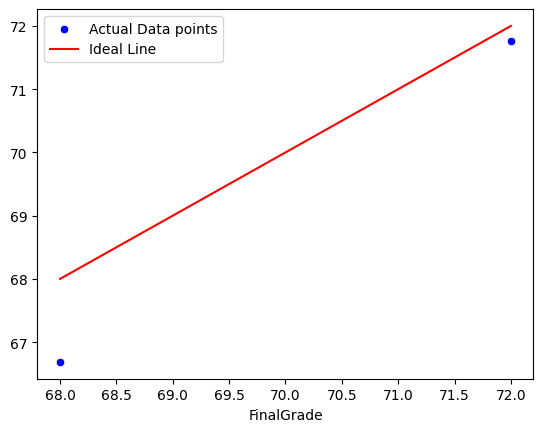

In [ ]:
#visualize data
sns.scatterplot(x=y_test, y=y_pred, color = 'blue', label = 'Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
#Compare actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

#printing the results
print("Actual Values | Predicted Values")
print("------------")
for actual, predicted in results:
  print(f"{actual:14.2f} | {predicted: 12.2f}")

Actual Values | Predicted Values
------------
         72.00 |        71.75
         68.00 |        66.69


In [ ]:
residual = actual - y_pred.reshape(-1)
print(residual)

[-3.75445407  1.31258709]


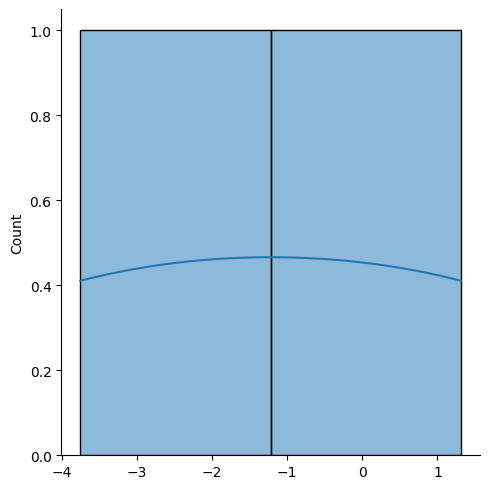

In [ ]:
#Distribution plot for Residual (difference between actual and predicted values)
sns.displot(residual, kde=True)
plt.show()

# **Model Evaluation**

In [ ]:
# score it
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
#Results
print('---'*30)
#mean square_error (y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# print evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Linear Regression Model
------------------------------------------------------------------------------------------
Mean Squared Error: 0.8915888322463783
Root Mean Squared Error: 0.9442398171261251


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

#Predicting the final grade using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf, y_test)

#Random forest regression accuracy with test set
print("Decision Tree Regression:", DTr)

Decision Tree Regression: 22.35744999999997


# **Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

#Predicting the final grades using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf, y_test)

#Random forest regression accuracy with test set
print("Random Forest Regression:", RFr)



Random Forest Regression: 20.846249999999976


# **Gradient Boosting Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train, y_train)

#Predicting the final grades using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random forest regression accuracy with test set
GBr = mean_squared_error(y_pred_rf, y_test)
print("Gradient Boosting Regression:", GBr)

Gradient Boosting Regression: 18.988664059711382


In [ ]:
#Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression":0.891588832246378,
    "Decision Tree ":20.877250000000018,
    "Random Forest":21.10420000000003,
    "Gradient Boosting Regression": 16.048381291719913
}

#sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

#Display the rankings of the models
print('Model Rankings (lower values are better):')
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
  print(f"{rank}.{model_name}: {score}")

Model Rankings (lower values are better):
1.Linear Regression: 0.891588832246378
2.Gradient Boosting Regression: 16.048381291719913
3.Decision Tree : 20.877250000000018
4.Random Forest: 21.10420000000003
